# sierras tutorial

In this tutorial we will use the **sierras** module to extrapolate the value of the diffusion coefficient at room temperature.

First we are going to import the libraries we will need

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We use the data obtained in the work of [Fuller](https://doi.org/10.1103/PhysRev.91.193)

In [2]:
temperatures = np.array([1250, 1153.36, 1063.13, 970.65, 861.04, 769.34]).reshape(-1, 1)
diffusion_coeffs = np.array([7.72104e-6, 4.386714e-6, 2.23884e-6, 5.58574e-7, 5.15115e-7, 7.58213e-8])

We import the `ArrheniusRegressor` class from **sierras**

In [3]:
from sierras import ArrheniusRegressor

As can be consulted in the API documentation, this class works in a sklearn-like way and we can obtain the activation energy as an attribute of the object, plot agains the experimental data and convert results to a `pandas.DataFrame`.

We start by creating an arrhenius regressor object from the class

In [4]:
k_boltzmann = 8.617333262e-5
areg = ArrheniusRegressor(k_boltzmann)

## fit the data

In [5]:
areg.fit(temperatures, diffusion_coeffs)

ArrheniusRegressor(constant=8.617333262e-05)

We can access to the activation energy (in this case k$_B$ is in eV/K, so this must be in eV)

In [6]:
areg.activation_energy_

0.7617837303407903

## extrapolate to room temperature

We could use the predict method to extrapolate to any temperature, but room themperature is really relevant because the time required to obtain this value from a simulation is prohibitive.

In [7]:
areg.predict(np.array([[300.0]]))

array([1.38566408e-15])

We see that the diffusion coefficient is in units of centimeters squared over seconds, which are the usual ones in the area and the ones that were defined by default when instantiating the class.

## plot

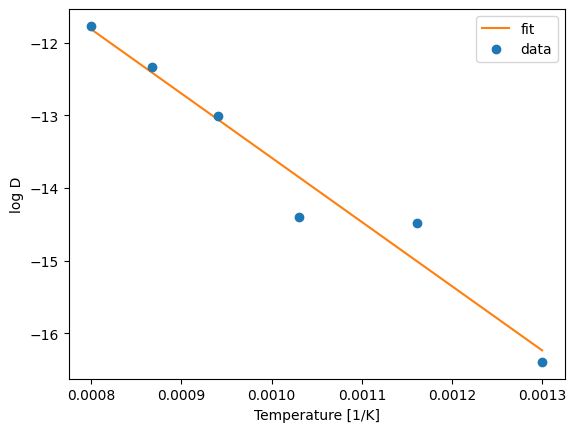

In [8]:
areg.plot.arrhenius(temperatures, diffusion_coeffs)
plt.xlabel("Temperature [1/K]")
plt.ylabel("log D")
plt.legend()
plt.show()